## Import packages and data

In [115]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
# import each table as a dataframe
q = pd.read_csv('data/questions.csv')
q_scores = pd.read_csv('data/question_scores.csv')
a = pd.read_csv('data/answers.csv')
a_scores = pd.read_csv('data/answer_scores.csv')
comments = pd.read_csv('data/comments.csv')
emails = pd.read_csv('data/emails.csv')
groups = pd.read_csv('data/groups.csv')
group_mem = pd.read_csv('data/group_memberships.csv')
matches = pd.read_csv('data/matches.csv')
pros = pd.read_csv('data/professionals.csv')
school_mem = pd.read_csv('data/school_memberships.csv')
students = pd.read_csv('data/students.csv')
tags = pd.read_csv('data/tags.csv')
tag_users = pd.read_csv('data/tag_users.csv')
tag_questions = pd.read_csv('data/tag_questions.csv')


### Exploring students and their questions

In [46]:
# join questions, answers and scores together
q_scores.rename(index=str, columns={'id':'questions_id'}, inplace=True)
a_scores.rename(index=str, columns={'id':'answers_id'}, inplace=True)
qna = pd.merge(q.merge(q_scores,how='left'), a.merge(a_scores,how='left'), how='left', left_on='questions_id',
         right_on='answers_question_id', suffixes=['_questions','_answers'])

In [60]:
# combine questions with authors
questions_authors = pd.merge(q.merge(q_scores,how='left'), students, how='left', left_on='questions_author_id', 
                          right_on='students_id')

In [64]:
# get the top 10 highest-scoring industries
location_group = questions_authors.groupby(['students_location'])
location_group.mean().sort_values(by='score',ascending=False).head(10)

,score
students_location,
"Liberty, Texas",84.000000
"Shanghai, China",82.000000
"Carmichael, California",59.000000
"Fayetteville, Georgia",34.666667
"Brunswick, Georgia",30.666667
"Solapur, Maharashtra, India",22.500000
"Suisun City, California",20.000000
"Vancouver, British Columbia, Canada",19.742424
"Johannesburg, Gauteng, South Africa",19.250000


### Exploring professionals and their answers

In [48]:
# combine answers with authors
answer_authors = pd.merge(a.merge(a_scores,how='left'), pros, how='left', left_on='answers_author_id', 
                          right_on='professionals_id')


,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,score,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,0.0,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...,0.0,2aa47af241bf42a4b874c453f0381bd4,"Atlanta, Georgia",Telecommunications,Senior Investigator at AT&T,2018-03-23 13:43:28 UTC+0000
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",0.0,cbd8f30613a849bf918aed5c010340be,"New Delhi, Delhi, India",Telecommunications,"Life Coach, Mentor & Author",2017-11-11 11:12:56 UTC+0000
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...,0.0,7e72a630c303442ba92ff00e8ea451df,"Woodbridge Township, New Jersey",Insurance,Global Head Travel Account Management,2017-05-09 19:21:33 UTC+0000
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...,0.0,17802d94699140b0a0d2995f30c034c6,"Seattle, Washington",Computer Software,Client Success Manager at Concur,2017-10-13 19:58:31 UTC+0000
5,5f62fadae80748c7907e3b0551bf4203,b03c3872daeb4a5cb1d8cd510942f0c4,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-12 16:01:44 UTC+0000,Networking is a key component to progressing y...,0.0,b03c3872daeb4a5cb1d8cd510942f0c4,Greater Philadelphia Area,High tech/computer software,"Seasoned customer marketing professional, pass...",2017-10-12 14:41:06 UTC+0000
6,1d804b3b9e764cdd90195fb138d1a5aa,f6c89fde797d45938bce3531f55c9b6b,5af8880460c141dbb02971a1a8369529,2017-09-29 18:50:11 UTC+0000,https://www.unigo.com/\n\nCheck out this websi...,0.0,f6c89fde797d45938bce3531f55c9b6b,"Philadelphia, Pennsylvania",Media Production,Film and Media Arts at Temple University,2017-09-28 14:10:15 UTC+0000
7,08d3cf6fa20543ddbdc42f70a7bcae9e,5bc2db4d58584f95bdba30ed2c21d573,5af8880460c141dbb02971a1a8369529,2018-06-08 02:39:02 UTC+0000,"<p>Hi Jocelyn ,</p><p><br></p><p>May I recomme...",0.0,5bc2db4d58584f95bdba30ed2c21d573,Greater San Diego Area,Primary/Secondary,School Counselor Intern Graduate,2018-05-09 02:31:50 UTC+0000
8,9d33d099a03c44328fbf166aad585f63,8136c8653d3a4895b49cac90b88120d2,7c336403258f4da3a2e0955742c76462,2017-03-01 16:52:43 UTC+0000,<p>For the typical schedule it takes four year...,0.0,8136c8653d3a4895b49cac90b88120d2,"Leesburg, Alabama",Construction,"Portfolio Director, Building Services",2017-03-01 03:14:13 UTC+0000
9,228e5feefb4e42188b7c48a5c7eb3aa8,35c8d979b56647839c8df0f0383648cd,be3c5edfdb07423e955e9b2d7f186bce,2017-10-13 18:08:20 UTC+0000,Of course! I know someone who doubled in class...,0.0,35c8d979b56647839c8df0f0383648cd,"New York, New York",Music,Digita Marketing Manager,2017-05-05 15:56:39 UTC+0000


In [53]:
# get the top 10 highest-scoring industries
industry_group = answer_authors.groupby(['professionals_industry'])
industry_group.mean().sort_values(by='score',ascending=False).head(10)

,score
professionals_industry,
PHARMACEUTICALS,6.333333
CRIMINAL JUSTICE/LAW ENFORCEMENT/POLYGRAPH EXAMINER/MILITARY/BUSINESS OWNER,5.000000
Mental Health Care and Neuroscience,5.000000
Social Games,4.333333
Personal and Organizational Development,4.000000
Internet / Information Technology and Services,4.000000
"Design and manufacturing, leather goods",4.000000
"Education Technology, Career Coaching",3.000000
Video Games,3.000000


### How useful are tags?

In [65]:
# get a sample of tags
tags.head(10)

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor
5,54,engineering
6,129,career
7,89,medicine
8,53,science
9,55,engineer


In [71]:
# add tags to the question and answer table
tags_merged = pd.merge(tag_questions, tags, how='left', left_on='tag_questions_tag_id', right_on='tags_tag_id')
qna_tags = pd.merge(qna, tags_merged, how='left', left_on='questions_id', right_on='tag_questions_question_id')

What percentage of questions gets tagged?

What percentage of tagged questions gets answered vs. untagged?

What is the average question and answer score of tagged vs. untagged questions?

### Exploring "good" answers

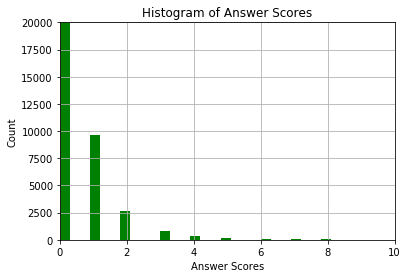

In [76]:
# First plot a histogram of answer scores
plt.hist(qna['score_answers'], 100, facecolor='g')
plt.xlabel('Answer Scores')
plt.ylabel('Count')
plt.title('Histogram of Answer Scores')
plt.axis([0, 10, 0, 20000])
plt.grid(True)
plt.show()

## Prepping data for summarization

In [98]:
# extract just the answer bodies and remove nulls
answers = a['answers_body'].dropna()
# set up an empty list to populate the parsed data
answers_text = []
ans_clean = []
# for each line in answers, remove HTML encoding
for ans in answers:
    soup = BeautifulSoup(ans, 'html.parser')
    # find all the paragraph portions of the answer
    # extract the text
    for section in soup.find_all('p'):
        # combine each section's text into "clean" list
        ans_clean.append(section.get_text())
    # concatenate all the sections and add to answers_preprocessed
    answers_text.append(' '.join(map(str,ans_clean)))
    # reset ans_clean for next row
    ans_clean = []

In [99]:
# compare raw and extracted outputs
print('Raw output: \n', answers[0])
print('\nExtracted text: \n', answers_text[0])

Raw output: 
 <p>Hi!</p>
<p>You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question.</p>
<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>
<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>
<p>Let me know if this helps</p>

Extracted text: 
 Hi! You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question. http://mathforum.org/dr.math/faq/faq.why.math.html http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html Let me know if this helps


In [107]:
# convert everything to lower case
answers_lower = [ans.lower() for ans in answers_text]
# find all the URLs and store them in a separate list
answers_links = [re.findall(r"http\S+", ans) for ans in answers_lower if re.findall(r"http\S+", ans)]
# then remove the URLs from the answers
answers_nolinks =  [re.sub(r"http\S+", "", ans) for ans in answers_lower]

In [109]:
# check that URLs made it into separate list
answers_links[0:10]

[['http://mathforum.org/dr.math/faq/faq.why.math.html',
  'http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html'],
 ['http://www.wikihow.com/choose-the-right-career',
  'https://www.themuse.com/advice/the-most-useful-personality-quiz-youll-take-this-week',
  'https://www.careerkey.org/choose-a-career/how-to-choose-a-career.html#.v54w0fkrltq'],
 ['http://www.youtube.com/watch?v=20yzbpvizme&feature=related'],
 ['http://sbdc.calpoly.edu'],
 ['http://www.ada.org/en/education-careers/careers-in-dentistry/be-a-dentist/high-school-student'],
 ['http://www.paulgraham.com/articles.html)',
  'https://www.legalzoom.com/articles/how-much-does-a-patent-cost),',
  'https://www.entrepreneur.com/article/204918).'],
 ['http://www.psychologycareercenter.org/industrial-psychology-degrees.html',
  'http://job-descriptions.careerplanner.com/industrial-organizational-psychologists.cfm'],
 ['https://www.theatlantic.com/magazine/archive/2014/10/what-happens-when-we-all-live-to-100/379338/https:

In [110]:
# check that URLs were removed from test answer
answers_nolinks[0]

'hi! you are asking a very interesting question.  i am giving you two sites that will give you some of an explanation that may answer your question.   let me know if this helps'

In [111]:
# remove special characters
answers_clean = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", ans) for ans in answers_nolinks]
# convert to DataFrame
answers_df = pd.DataFrame(np.array(answers_clean).reshape(-1), columns=['answers'])

In [113]:
answers_df['answers'][0]

'hi you are asking a very interesting question  i am giving you two sites that will give you some of an explanation that may answer your question   let me know if this helps'

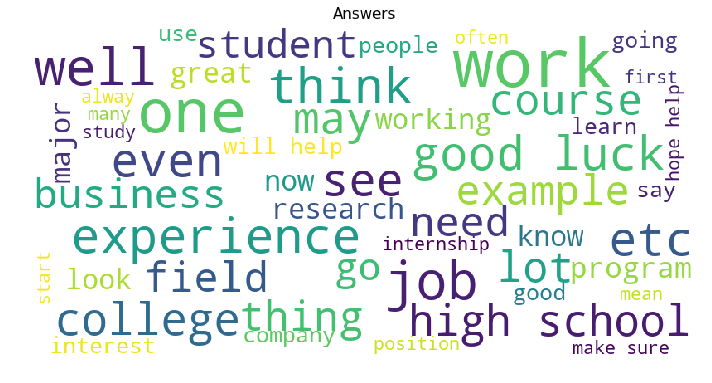

In [122]:
# Create wordcloud
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                stopwords = stopwords,
                max_words = 50,
                max_font_size = 80, 
                random_state = 42,
                width=800, 
                height=400,
                mask = None)
wordcloud.generate(str(answers_clean))
#set the plot parameters
plt.figure(figsize=(10,10))
plt.imshow(wordcloud);
plt.title('Answers', fontdict={'size': 15, 'color': 'black', 
                              'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 